In [4]:
import os

In [5]:
import pandas as pd

In [6]:
wines = pd.read_csv("winequality-red.csv")

In [7]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

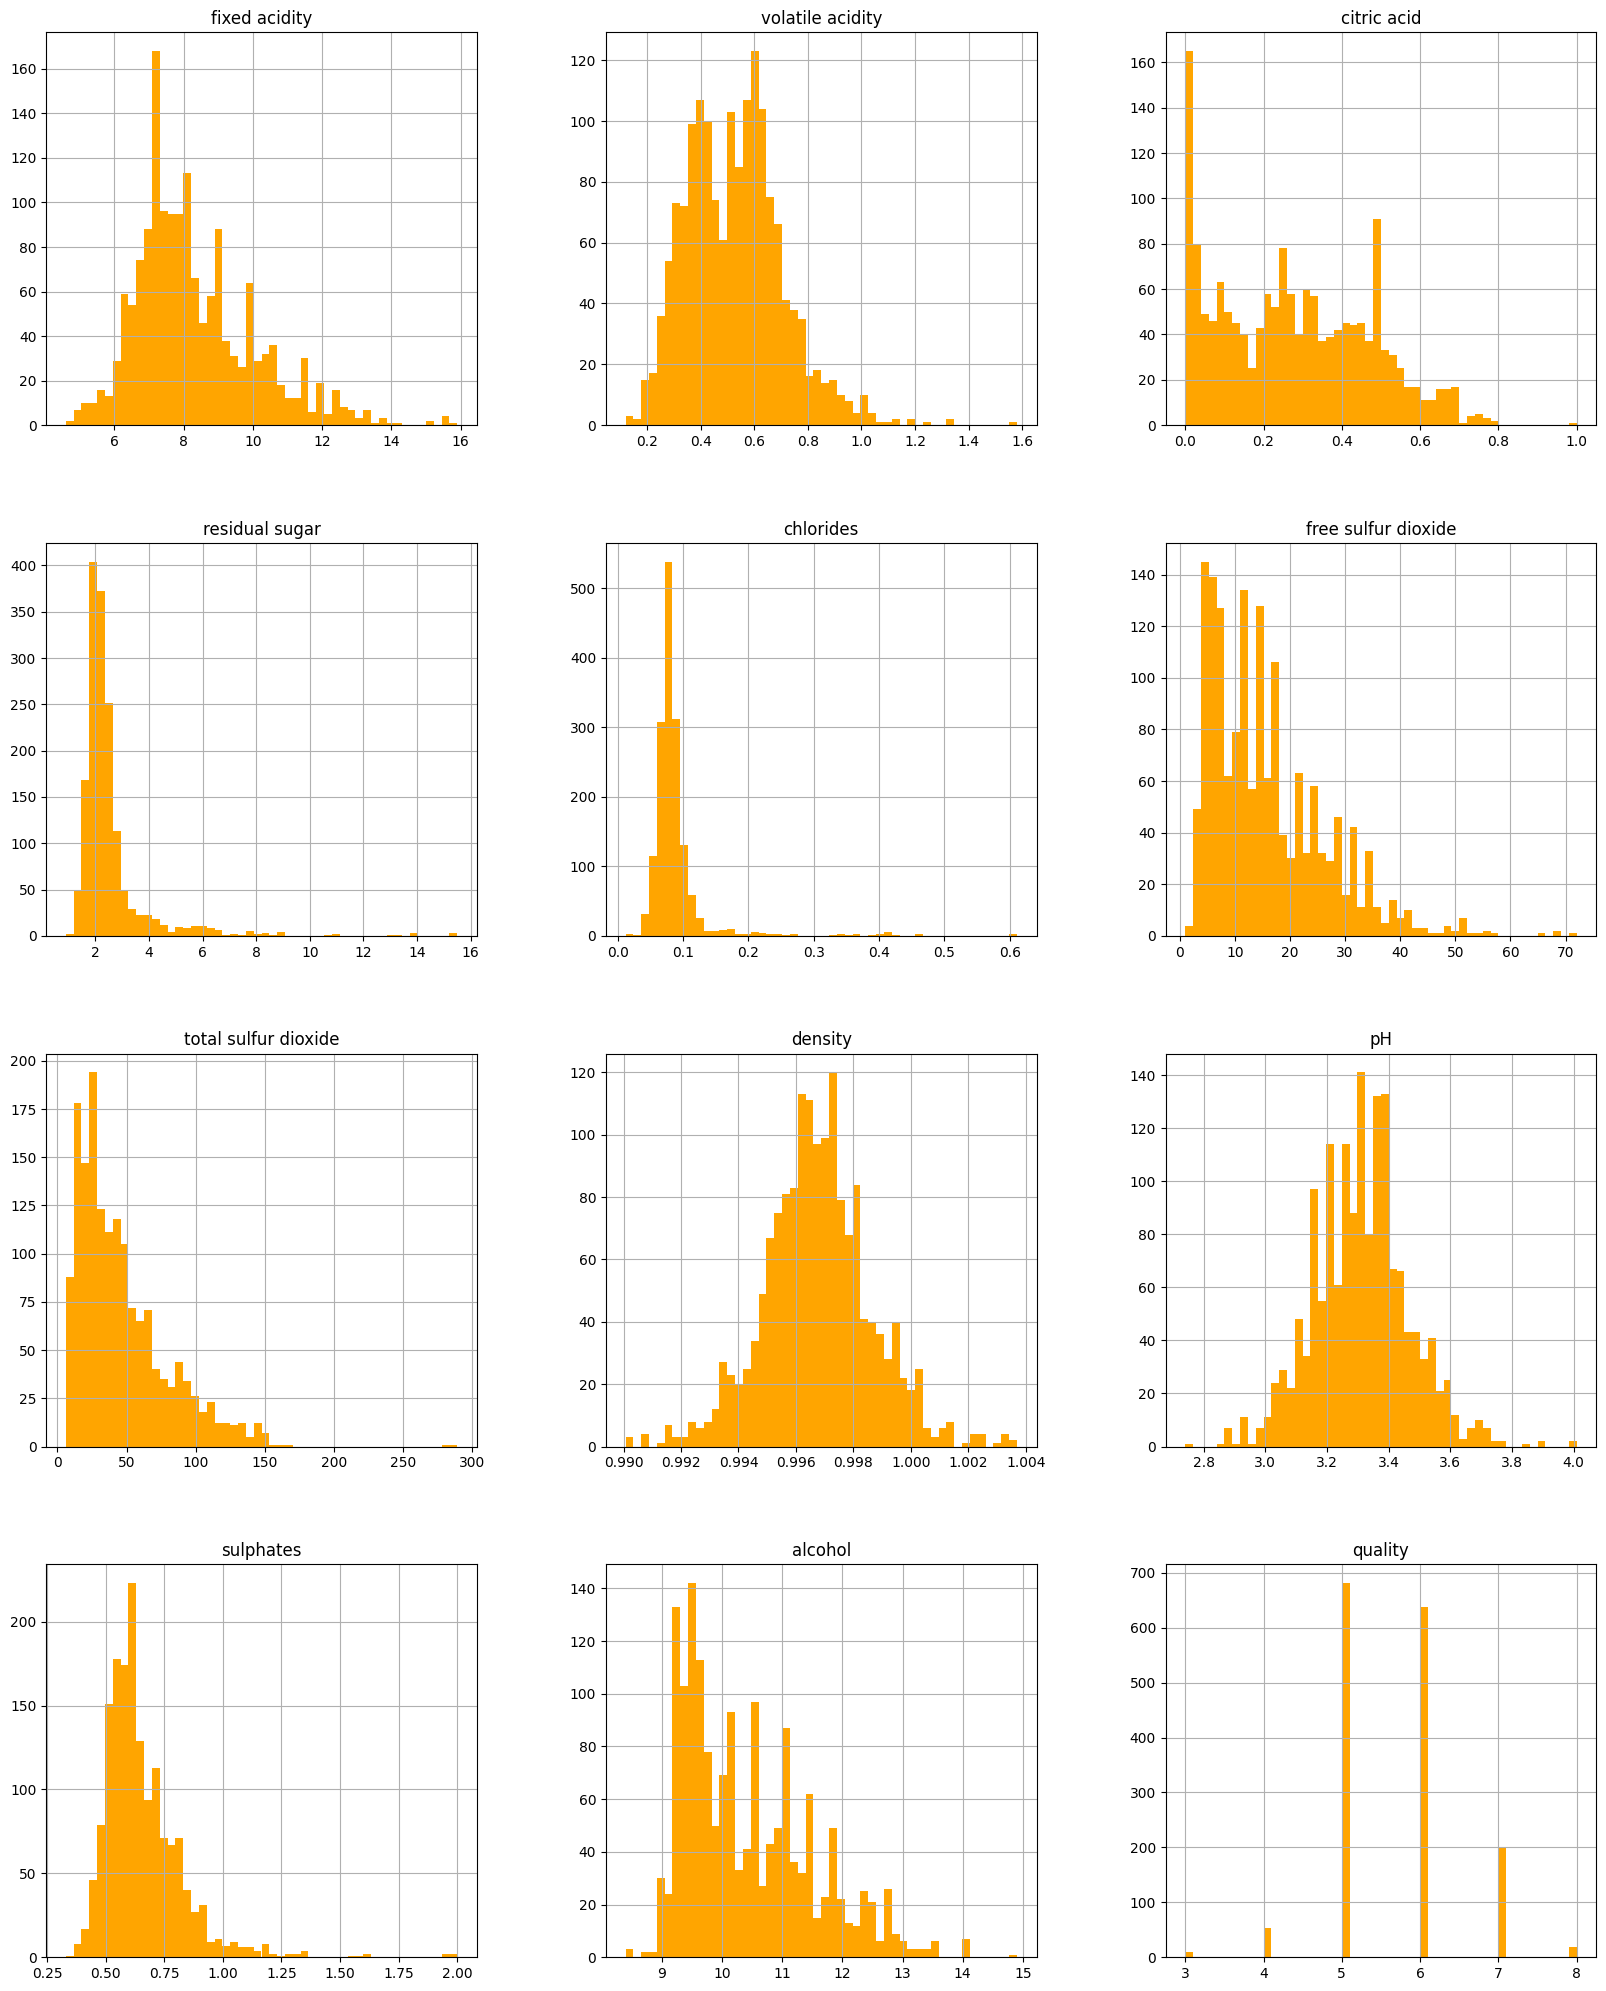

In [12]:
wines.hist(bins = 50, figsize=(20,25), color = "orange")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
X = wines.drop(['quality'], axis = 1)
Y = wines['quality']

In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
print(X_test.shape)
print(X_train.shape)

(320, 11)
(1279, 11)


In [20]:
print(Y_test.shape)
print(Y_train.shape)

(320,)
(1279,)


In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, Y_train)


ElasticNet(alpha=0.1, random_state=42)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [24]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2


In [25]:
predicted_value = lr.predict(X_test)

In [26]:
predicted_value

array([5.34821386, 5.14896267, 5.65056119, 5.53134648, 5.6652817 ,
       5.31972154, 5.03292294, 5.50873493, 5.46865651, 5.7321401 ,
       6.17879618, 5.47822529, 5.40776951, 5.29953678, 5.32254971,
       6.26441114, 5.31883929, 5.54649991, 6.0889127 , 5.32779967,
       5.76312796, 5.23315755, 6.06237923, 6.26824384, 5.48723822,
       5.35858014, 6.26274559, 5.51911137, 5.18391149, 5.69289577,
       5.33658209, 5.40301702, 5.42559935, 5.64112785, 5.46917091,
       5.15366879, 5.82333453, 5.63271619, 5.80577391, 5.96233672,
       5.70058967, 5.20610579, 5.79293927, 5.16865732, 5.49225571,
       5.68494401, 5.8633667 , 5.51850914, 5.67063273, 5.6147086 ,
       5.07550905, 5.16986105, 5.82211161, 6.00371098, 5.10341096,
       5.03471506, 5.85987335, 5.43017099, 5.75744542, 5.40386094,
       5.45724505, 5.80040573, 5.24365824, 5.23383276, 6.27133178,
       5.32525654, 6.15615222, 5.34575877, 6.0306709 , 5.32477447,
       6.25703864, 5.15638565, 5.37476237, 5.82430382, 6.10609

In [27]:
(rmse, mae, r2) = eval_metrics(Y_test, predicted_value)

In [28]:
print("RMSE = ", rmse)
print("MAE = ", mae)
print("R2 = ", r2)

RMSE =  0.6985911523308714
MAE =  0.5590548688059019
R2 =  0.25321312561494613
